## Objective

The main objective of my project is to predict wether a credit card application will be approved based on some factors

## Dataset
Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.




Based on the data above, I am going to predict if a credit card application is going to be approved

## Importing The Required Libraries


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import The Data

In [124]:
application = pd.read_csv("https://github.com/Chibueze864/IBM_ML_CERTIFICATION_COURSE/raw/main/Supervised%20Learning%20Projects/Classification/Final%20Project/archive/Credit_card.csv")
label = pd.read_csv("https://github.com/Chibueze864/IBM_ML_CERTIFICATION_COURSE/raw/main/Supervised%20Learning%20Projects/Classification/Final%20Project/archive/Credit_card_label.csv")

In [125]:
application.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


## Feature Engineering

Let us check the data types that exist in this dataset


In [126]:
application.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object

In [127]:
application.dtypes.value_counts()

int64      8
object     8
float64    2
dtype: int64

We have 10 features which are numeric and two which are categorical

Let us check for the columns with null values

In [128]:
columns_with_null = application.columns[application.isnull().any()]
columns_with_null

Index(['GENDER', 'Annual_income', 'Birthday_count', 'Type_Occupation'], dtype='object')

In [129]:
application[columns_with_null].dtypes

GENDER              object
Annual_income      float64
Birthday_count     float64
Type_Occupation     object
dtype: object

For the categorical features, we will replace the null values with the most frequently occuring value

In [130]:
for col in application[columns_with_null].select_dtypes(exclude="number").columns:
  application[col] = application[col].fillna(application[col].mode()[0])

In [131]:
columns_with_null = application.columns[application.isnull().any()]
columns_with_null

Index(['Annual_income', 'Birthday_count'], dtype='object')

For the numeric features, we will replace the null values with the mean of all the occurences

In [132]:
for col in application[columns_with_null].select_dtypes(include="number").columns:
  application[col] = application[col].fillna(application[col].mean())

In [133]:
columns_with_null = application.columns[application.isnull().any()]
columns_with_null

Index([], dtype='object')

We have filled in all the null values in  the dataframe

The column *Birthday_count* is in raw days. We want to get the actual age of the person in *years*

In [134]:
application['Age'] = (application['Birthday_count'].abs() / 365).astype(int)
application['Age']

0       51
1       37
2       43
3       37
4       37
        ..
1543    32
1544    28
1545    36
1546    41
1547    45
Name: Age, Length: 1548, dtype: int64

Let's see the ages of those who are applying

In [135]:
application['Age'].max()

68

The oldest applicant is 68 years old

In [136]:
application['Age'].min()

21

The youngest applicant is 21 years old

In [137]:
application['Age'].mode()[0]

43

43 years is the most common age for applicants

In [138]:
application['Age'].value_counts().idxmin()


68

68 years is the least common age for applicants

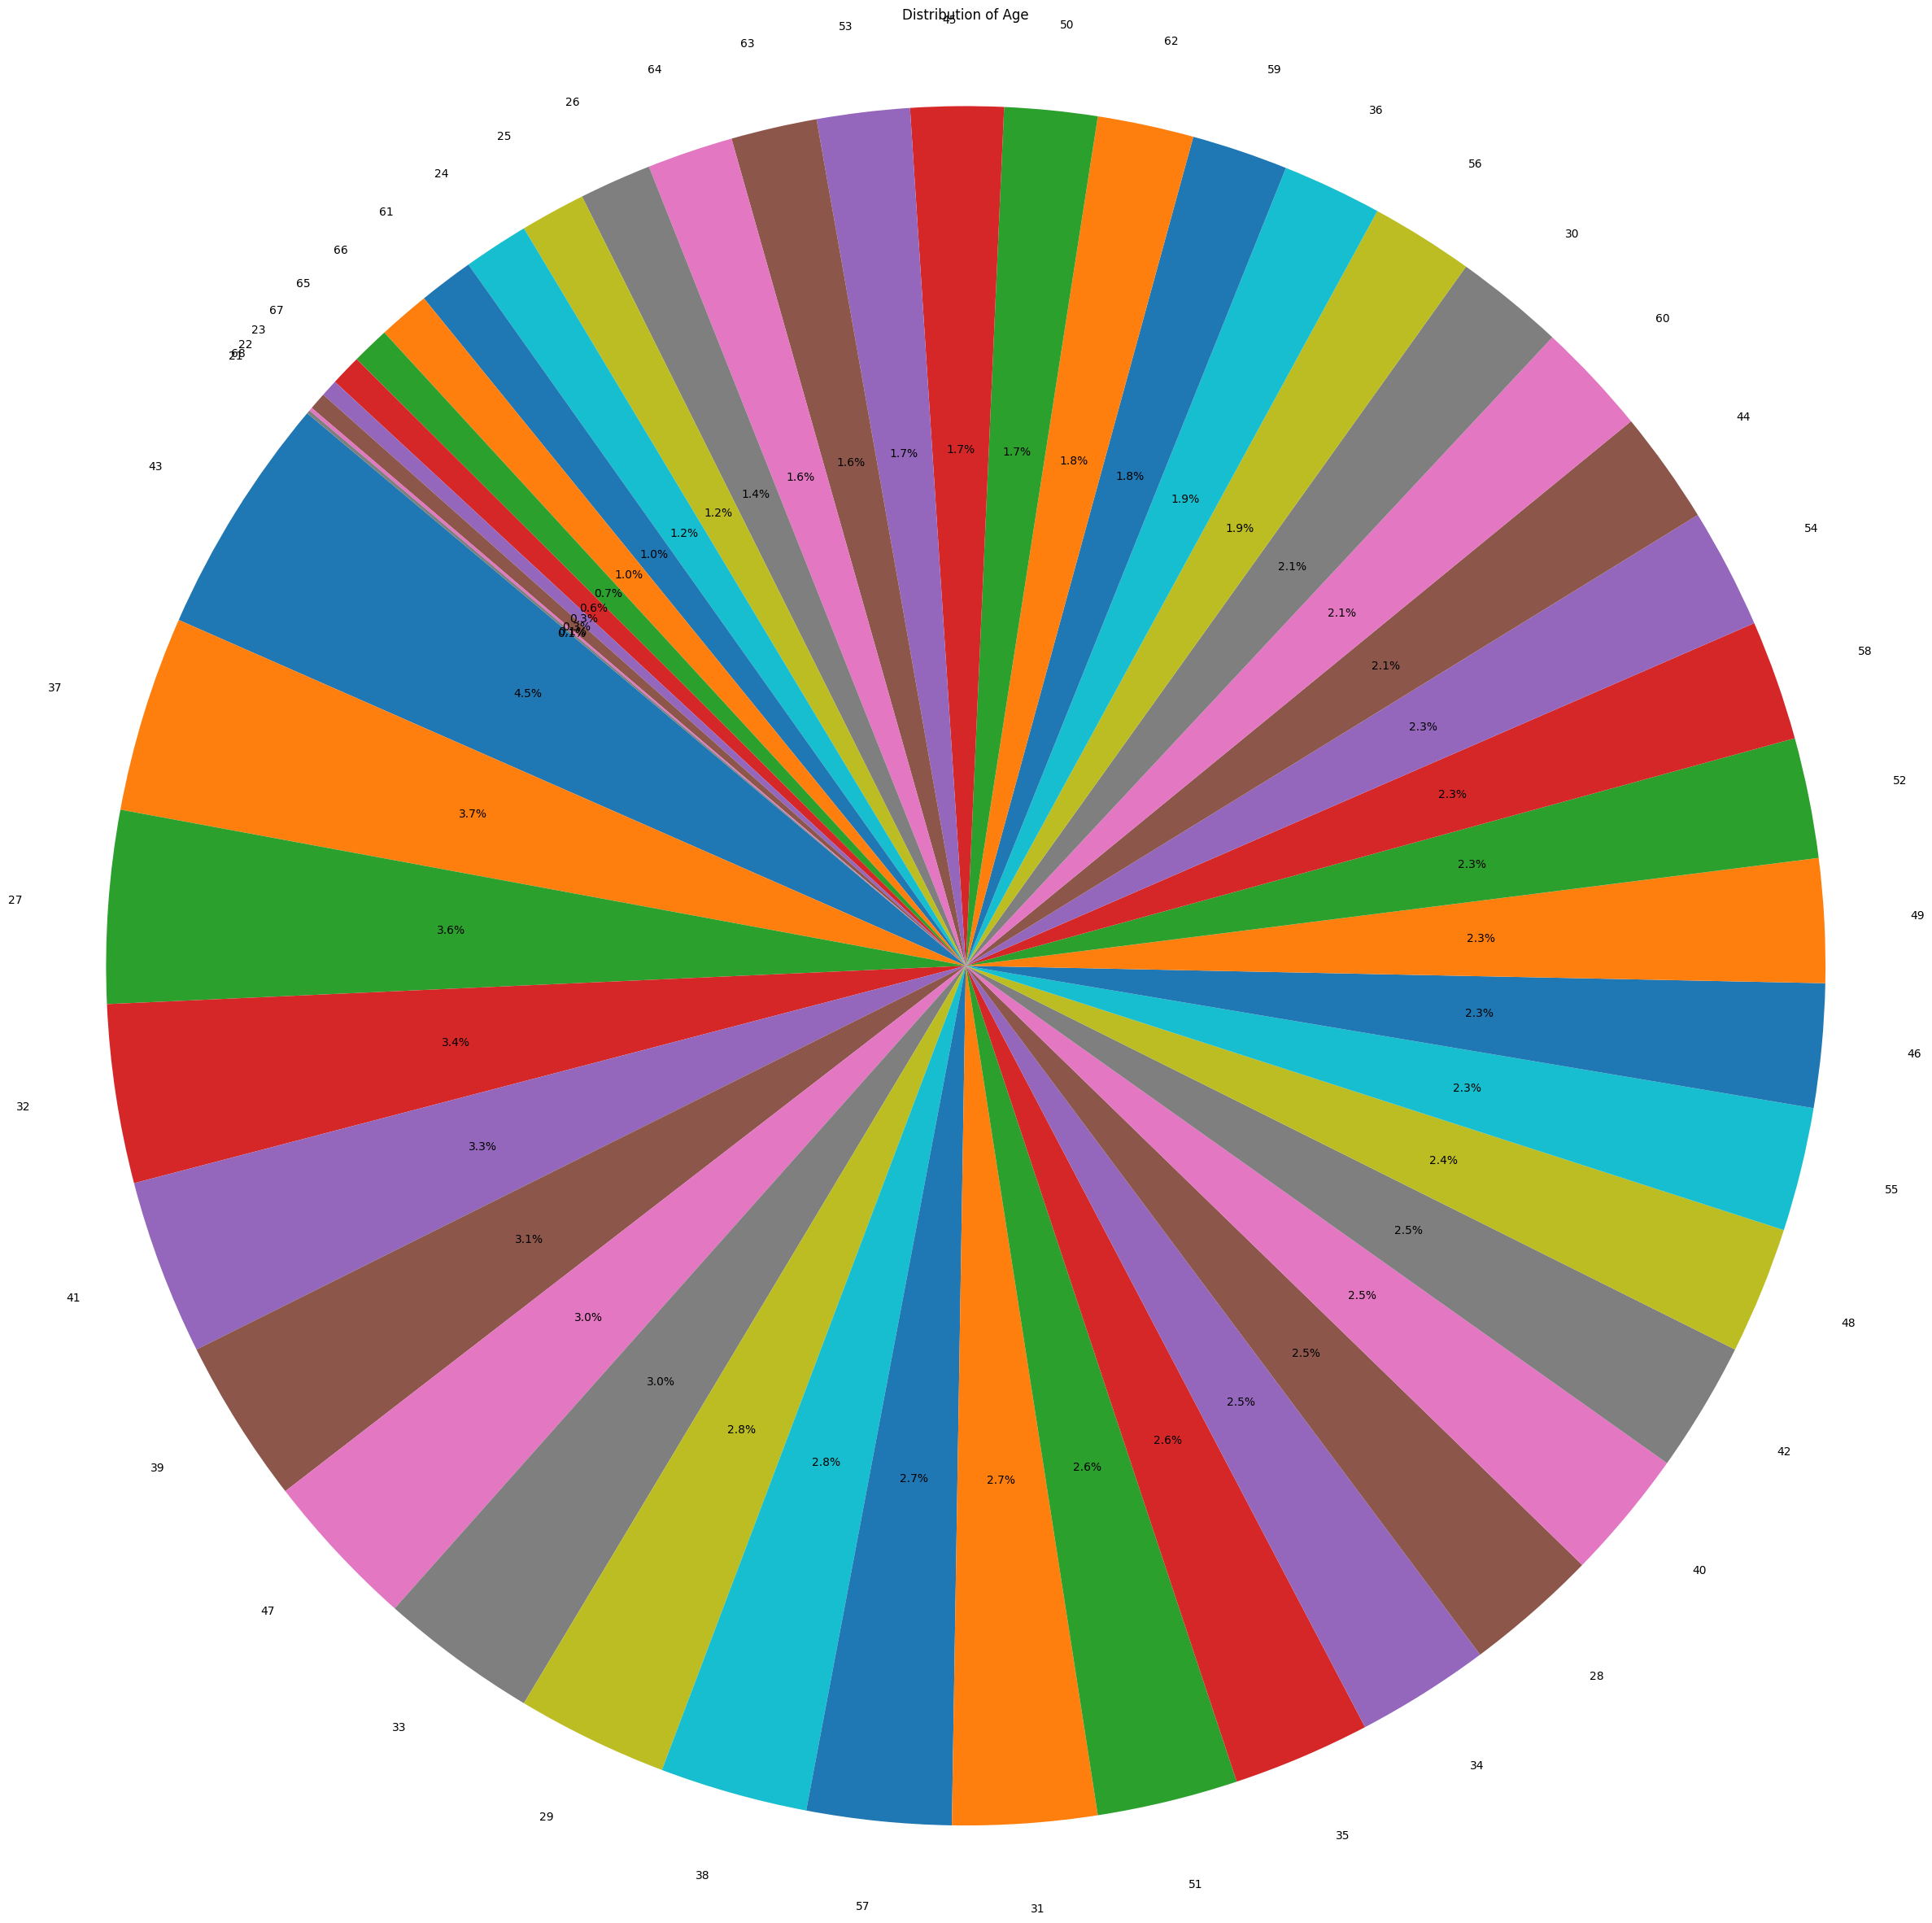

In [139]:
# Calculate the distribution of values
value_counts = application['Age'].value_counts()

# Create a pie chart
plt.figure(figsize=(30, 30))  # Set the figure size
plt.title('Distribution of Age')

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

Let's repeat the above to find the number of months that someone has been working

In [140]:

application["Employed_Months"]= (application["Employed_days"].abs()/ 30.44).astype(int)
application["Employed_Months"]

0       11998
1          19
2          19
3          19
4          19
        ...  
1543       71
1544       39
1545       81
1546       21
1547       93
Name: Employed_Months, Length: 1548, dtype: int64

Delete the *Birthday_count* and the *Employed_days* columns as they have been scaled

Delete the *Work_Phone*, *Phone*, *EMAIL_ID* and *Ind_ID* columns as there is no observable pattern that can be learnt from a column where all the values are unique

In [141]:
columns_to_drop = ["Birthday_count", "Employed_days", "Work_Phone", "Phone", 	"EMAIL_ID","Ind_ID"]
application.drop(columns=columns_to_drop, inplace=True)

Let's check the value distribution for each categorical column

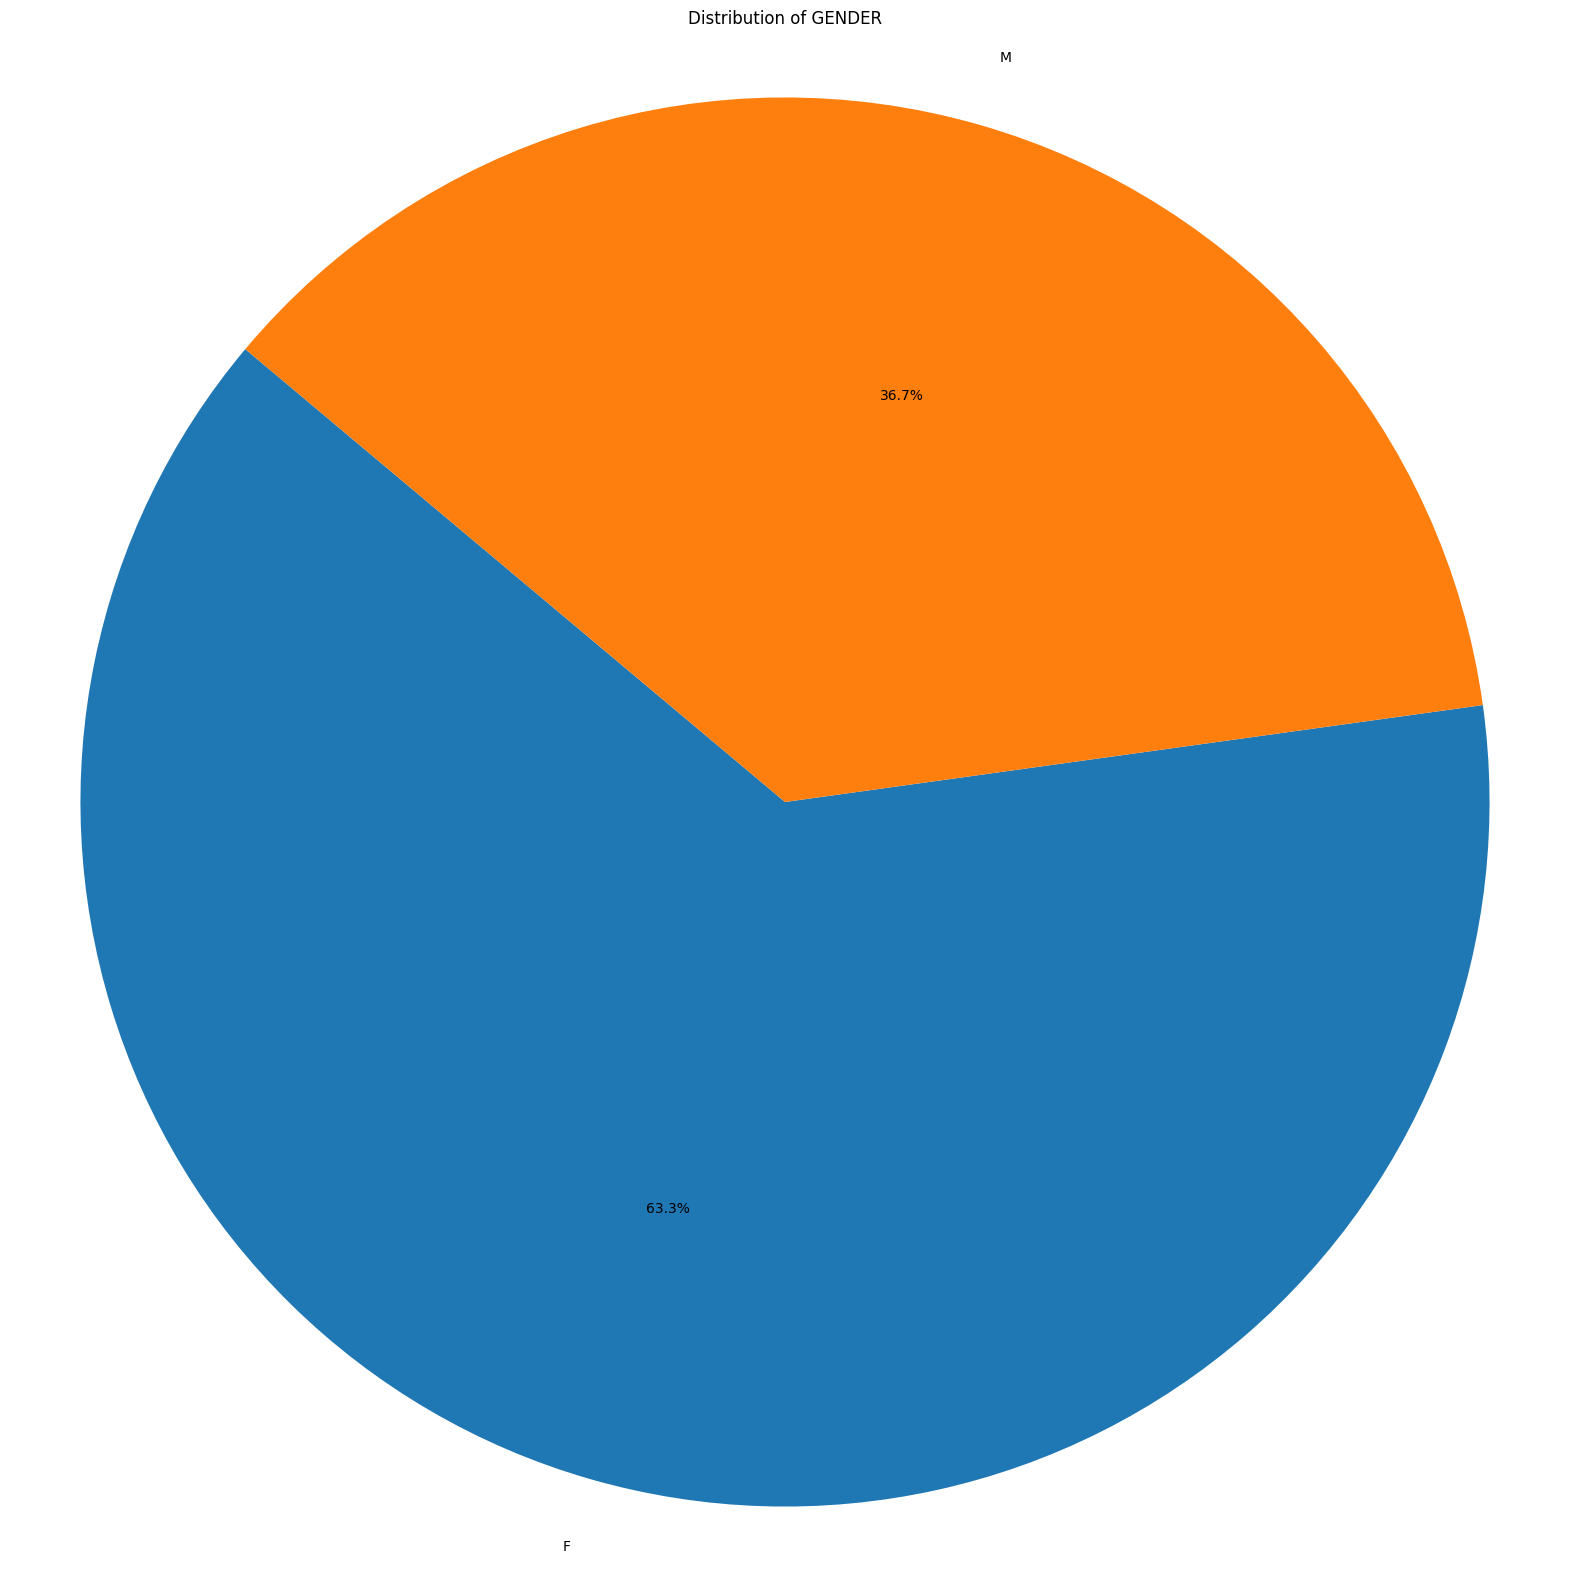

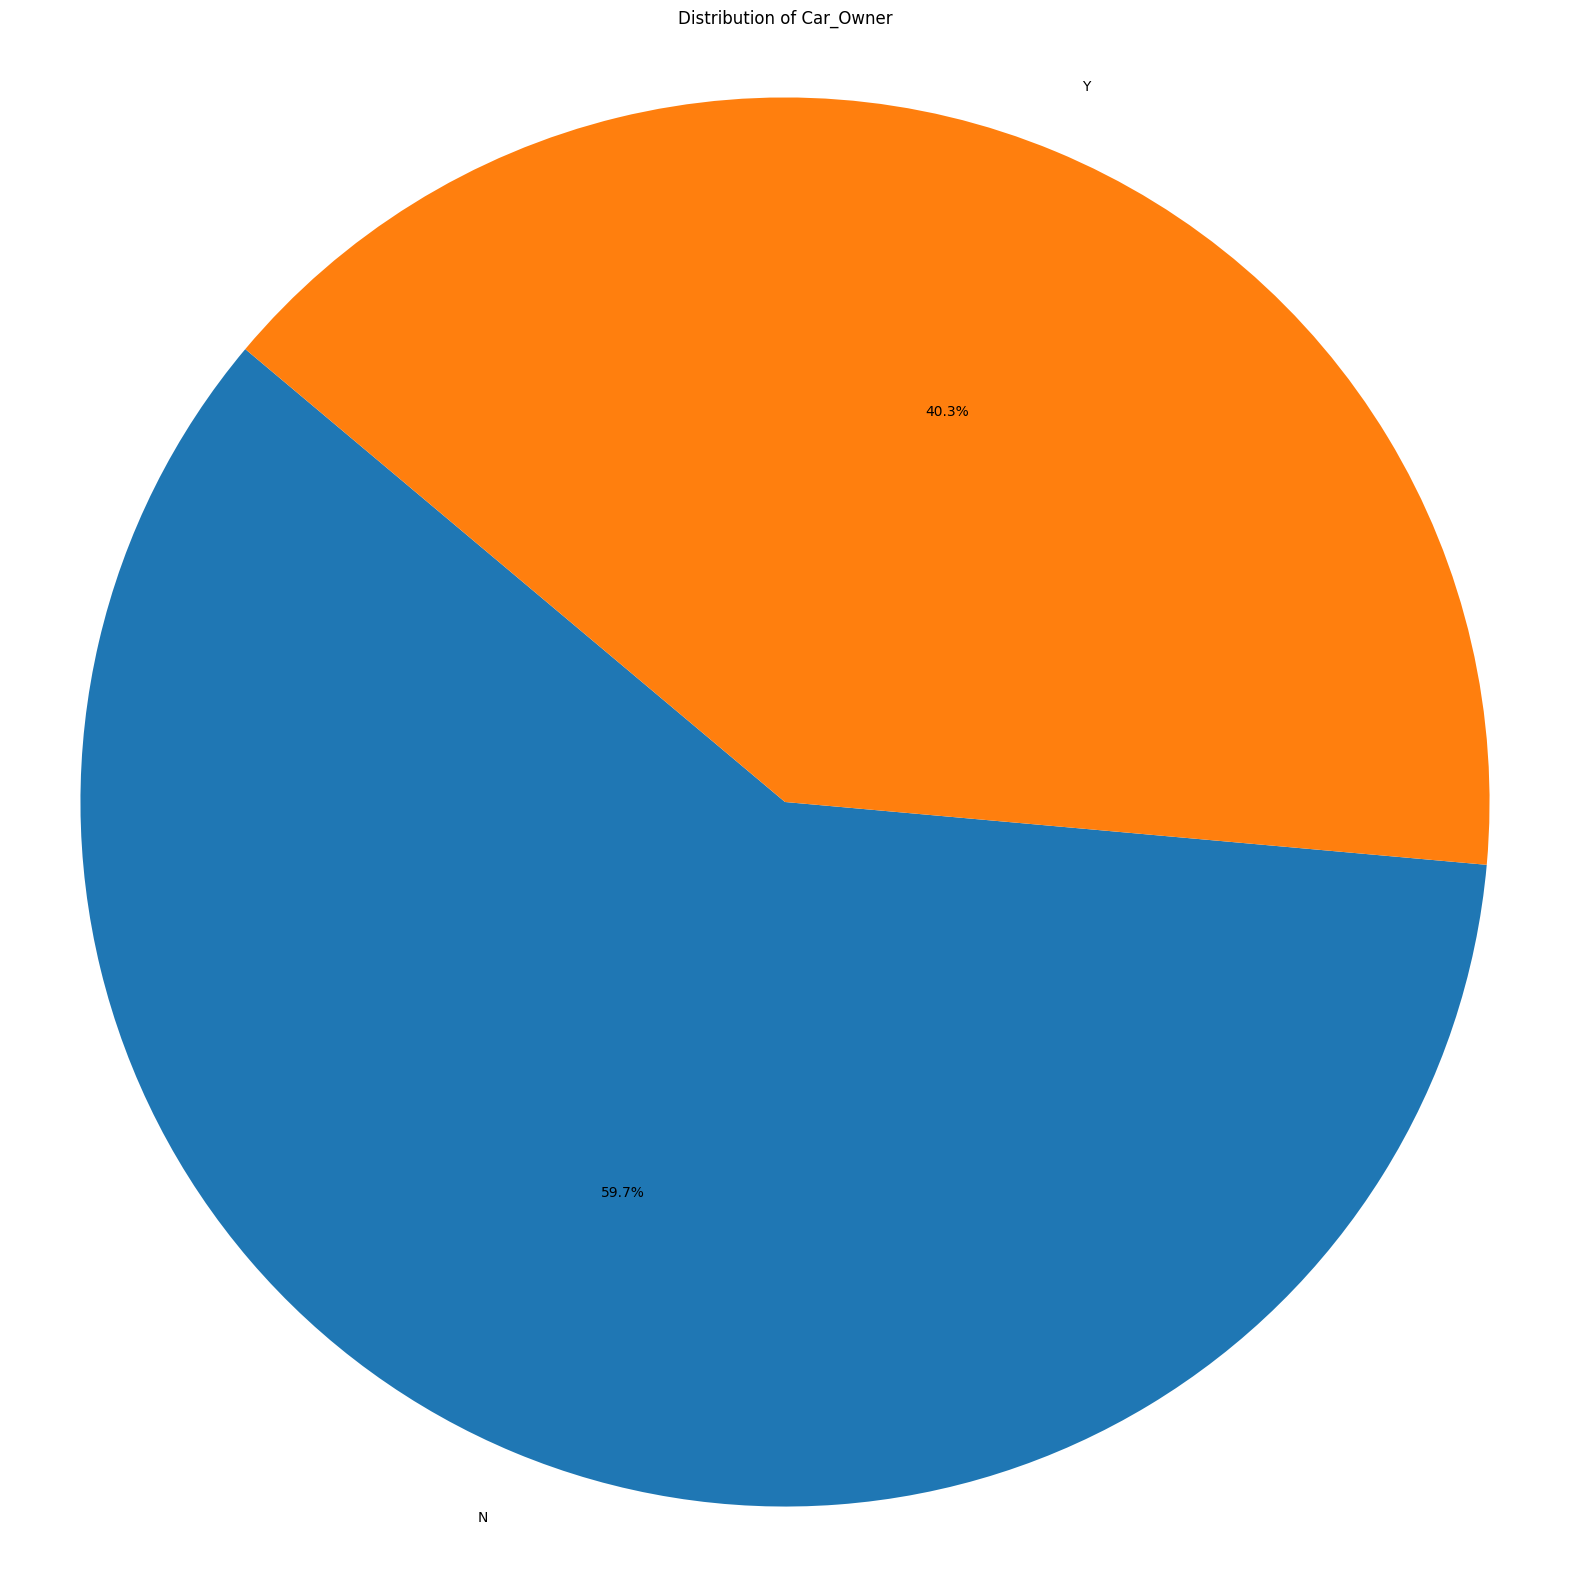

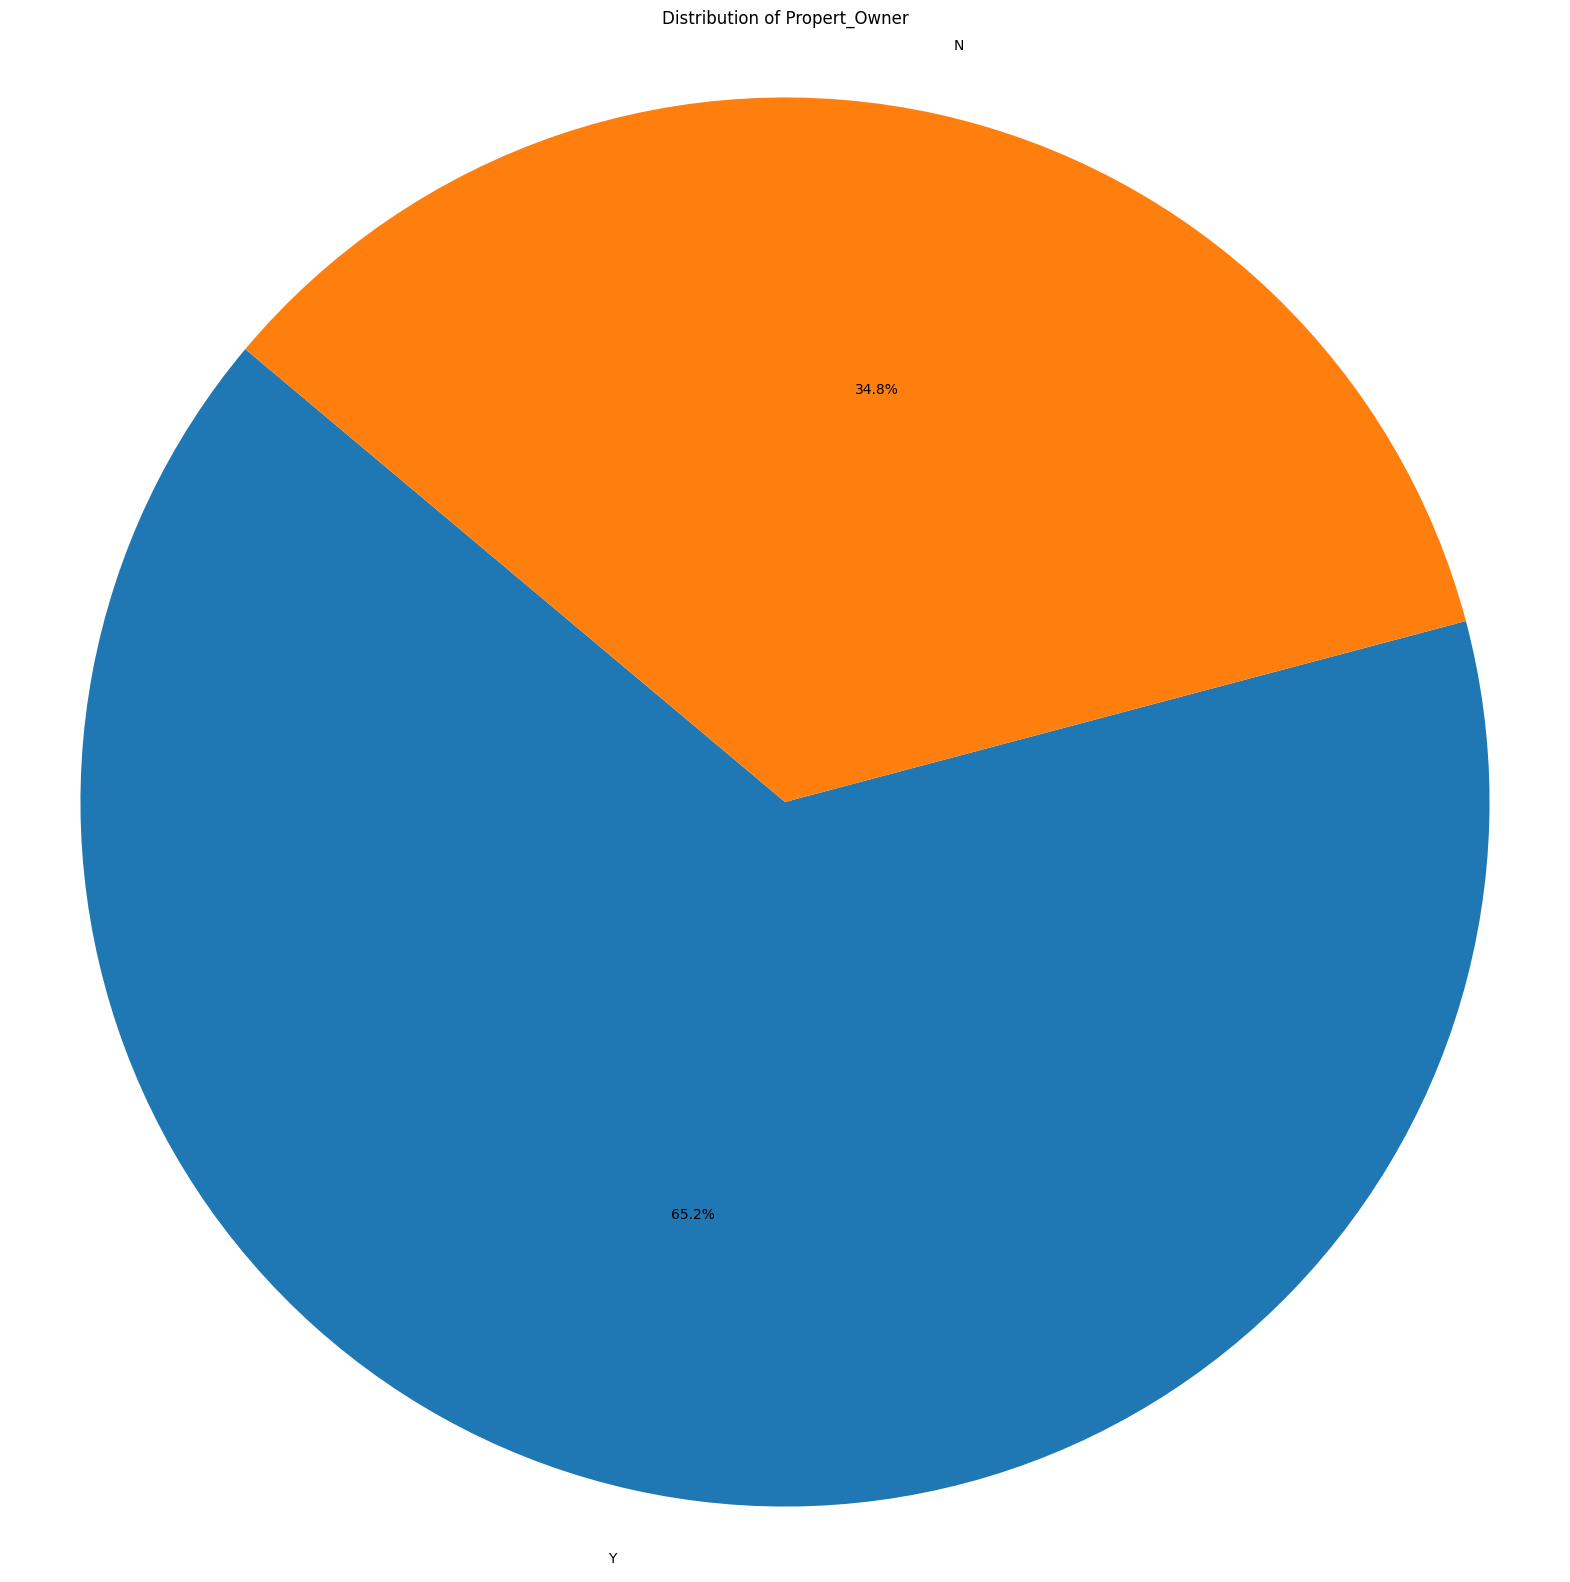

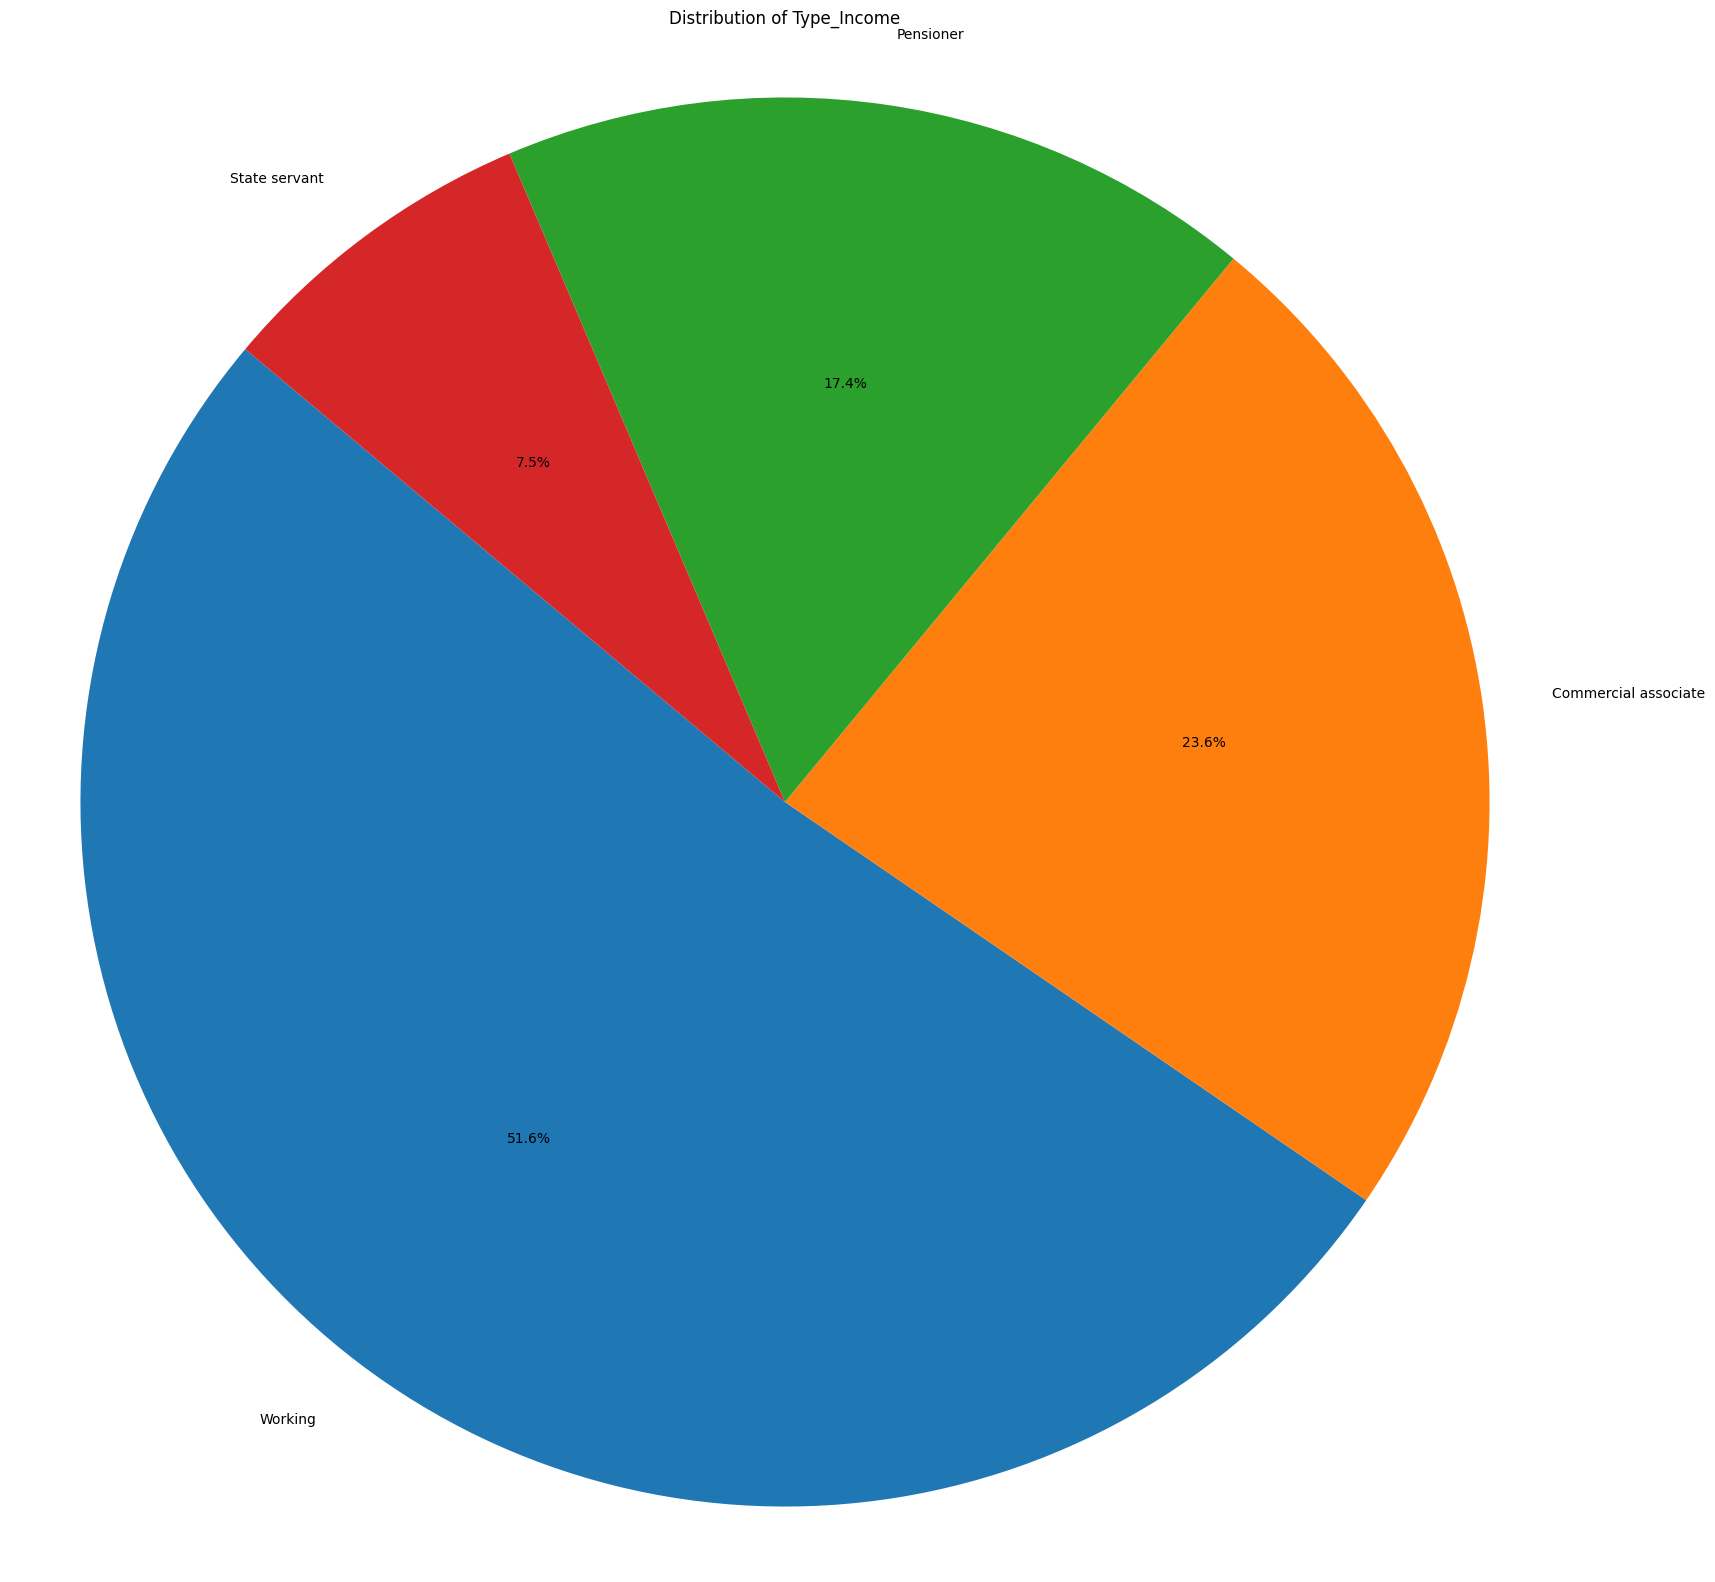

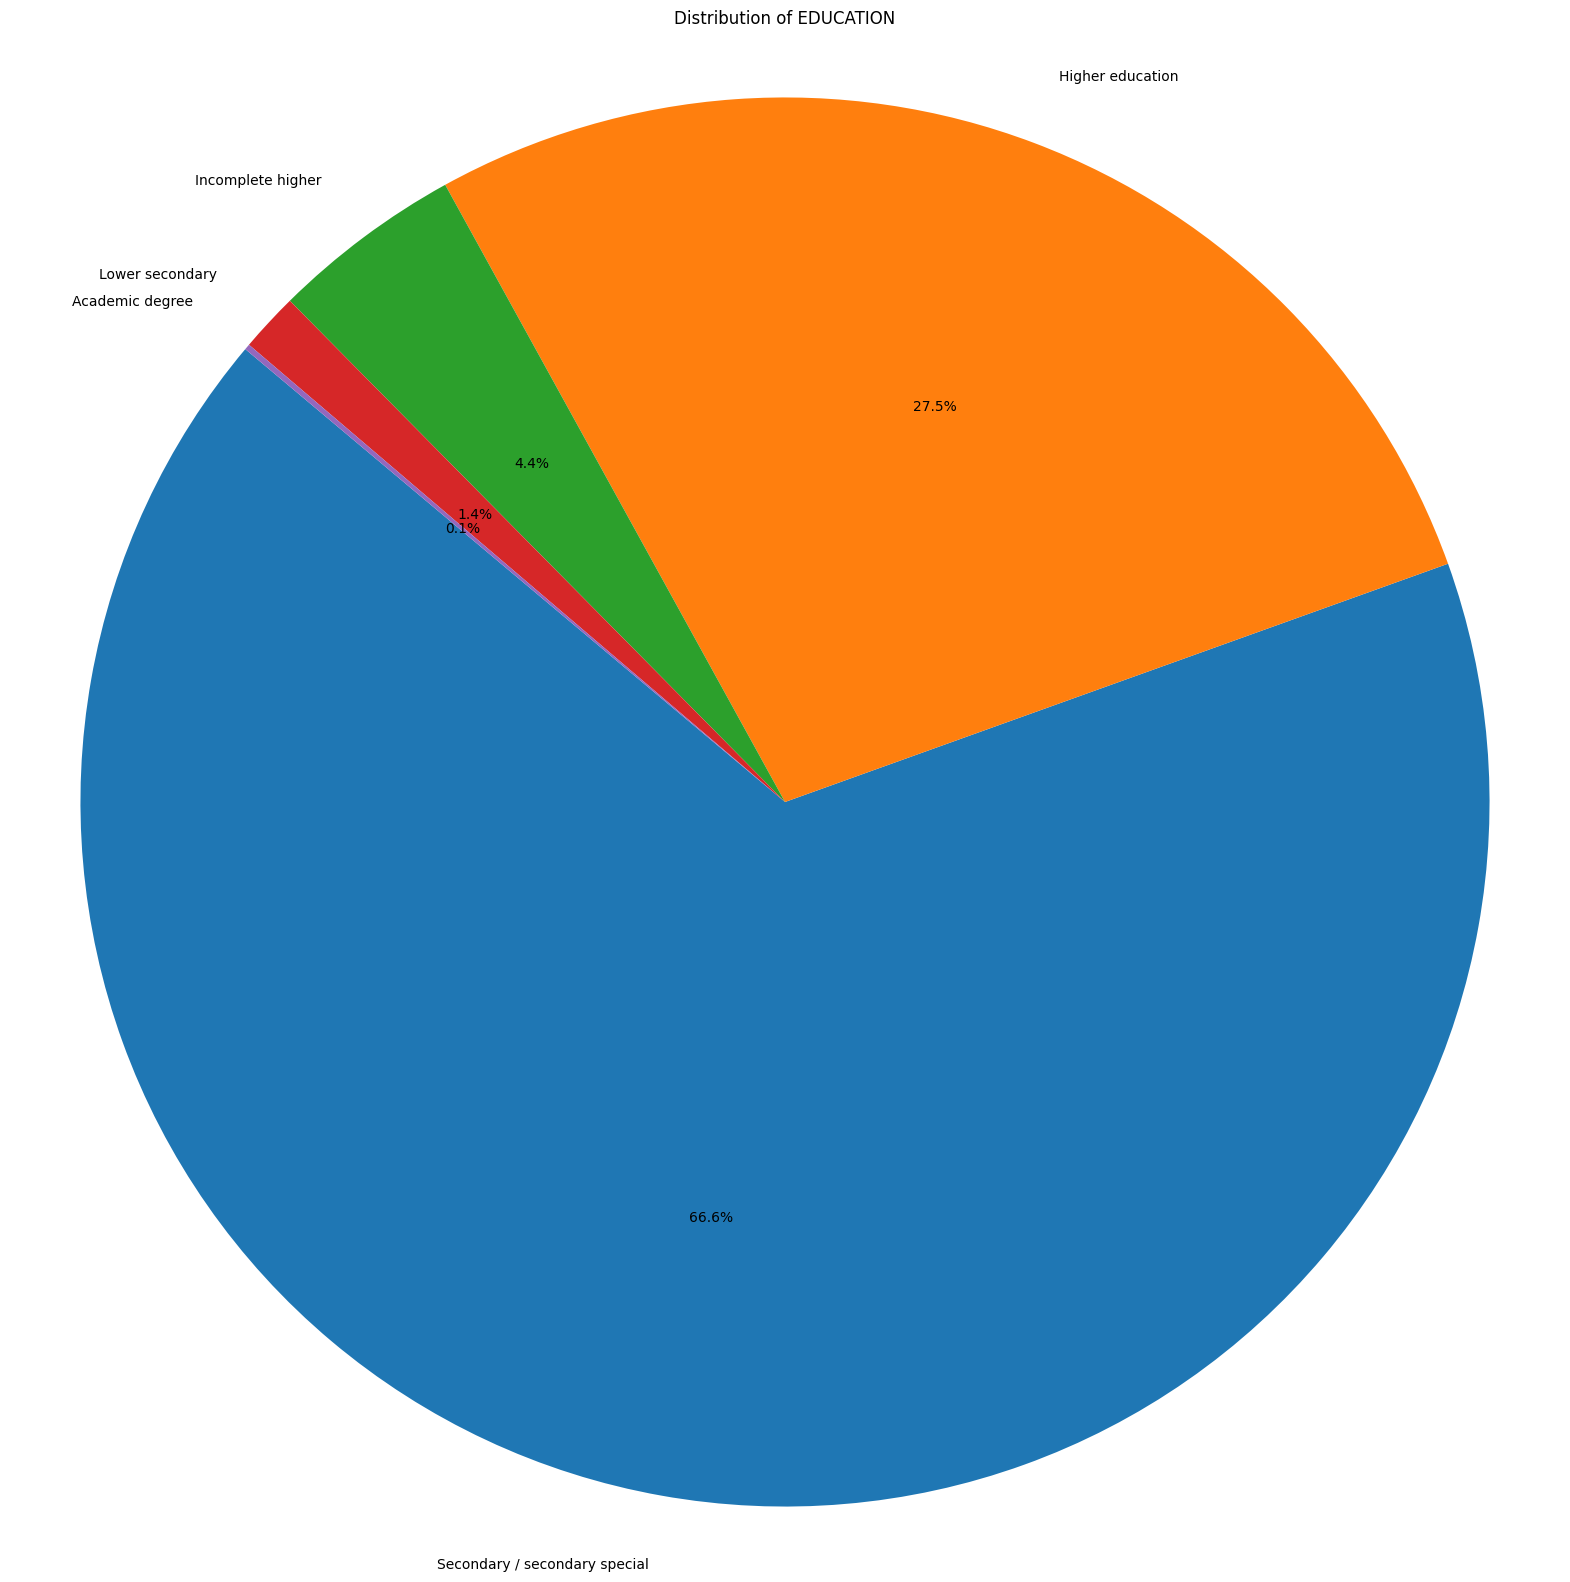

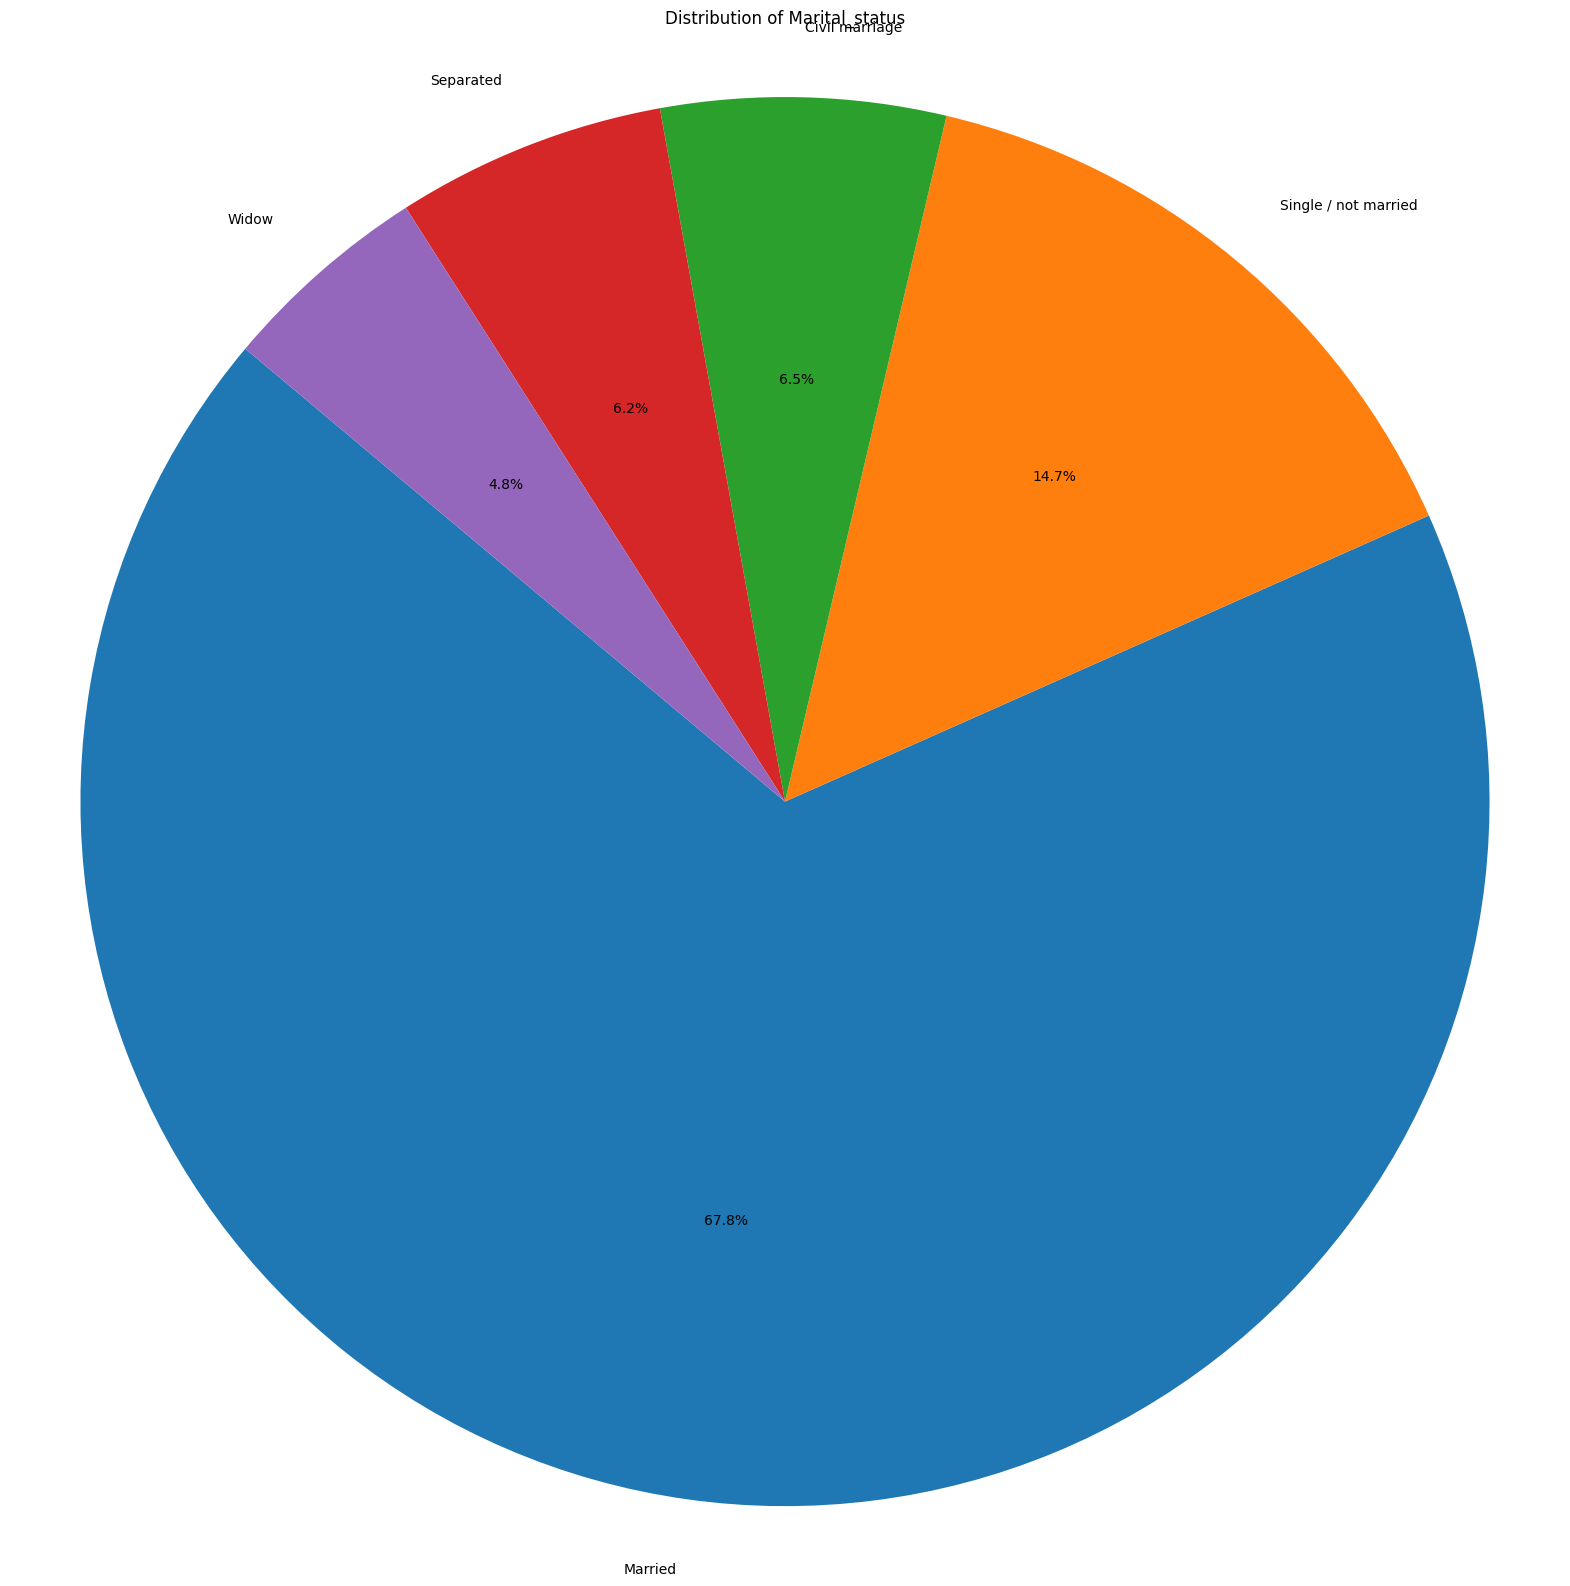

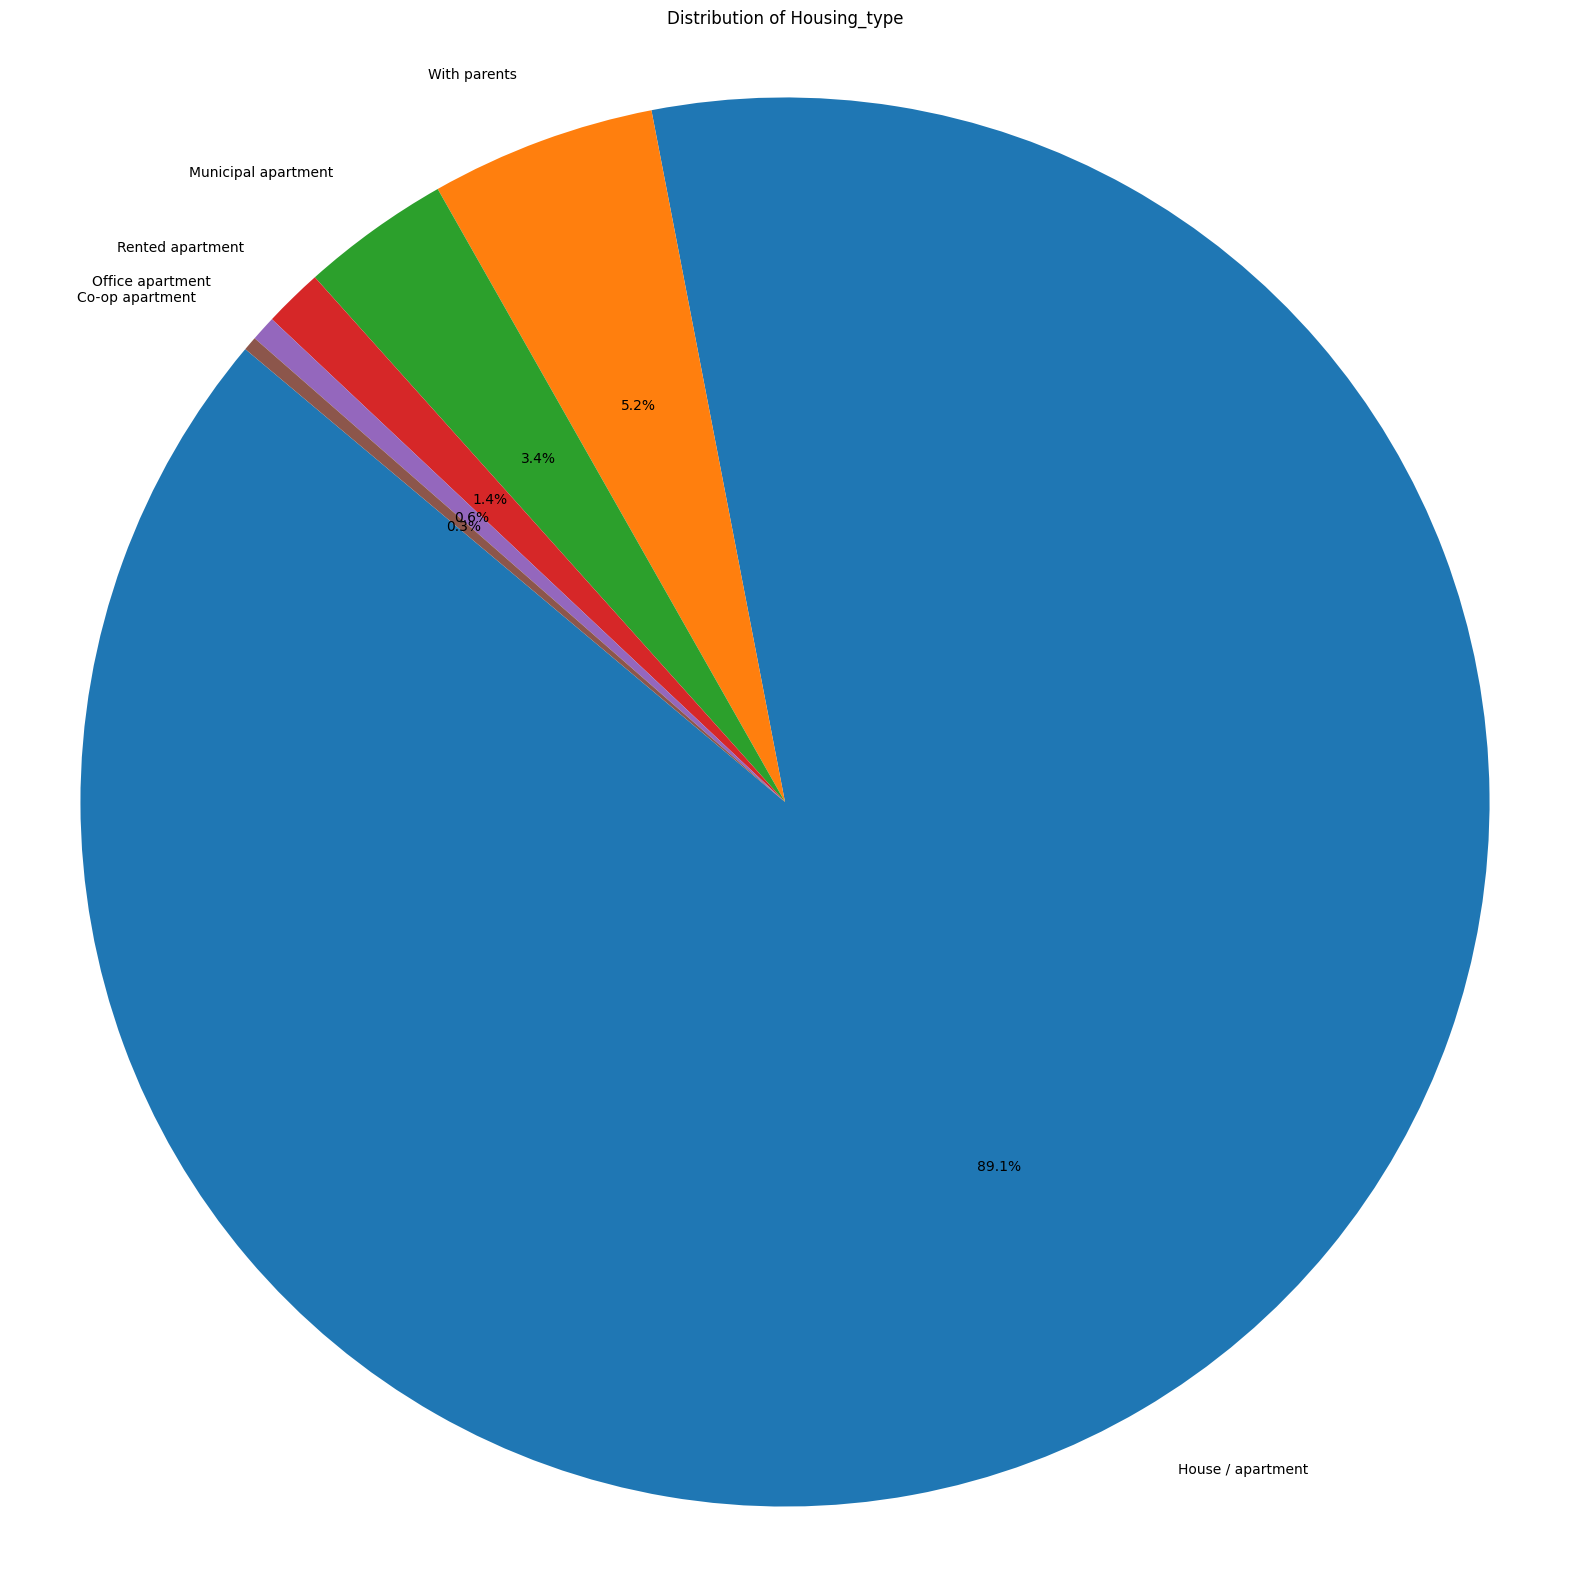

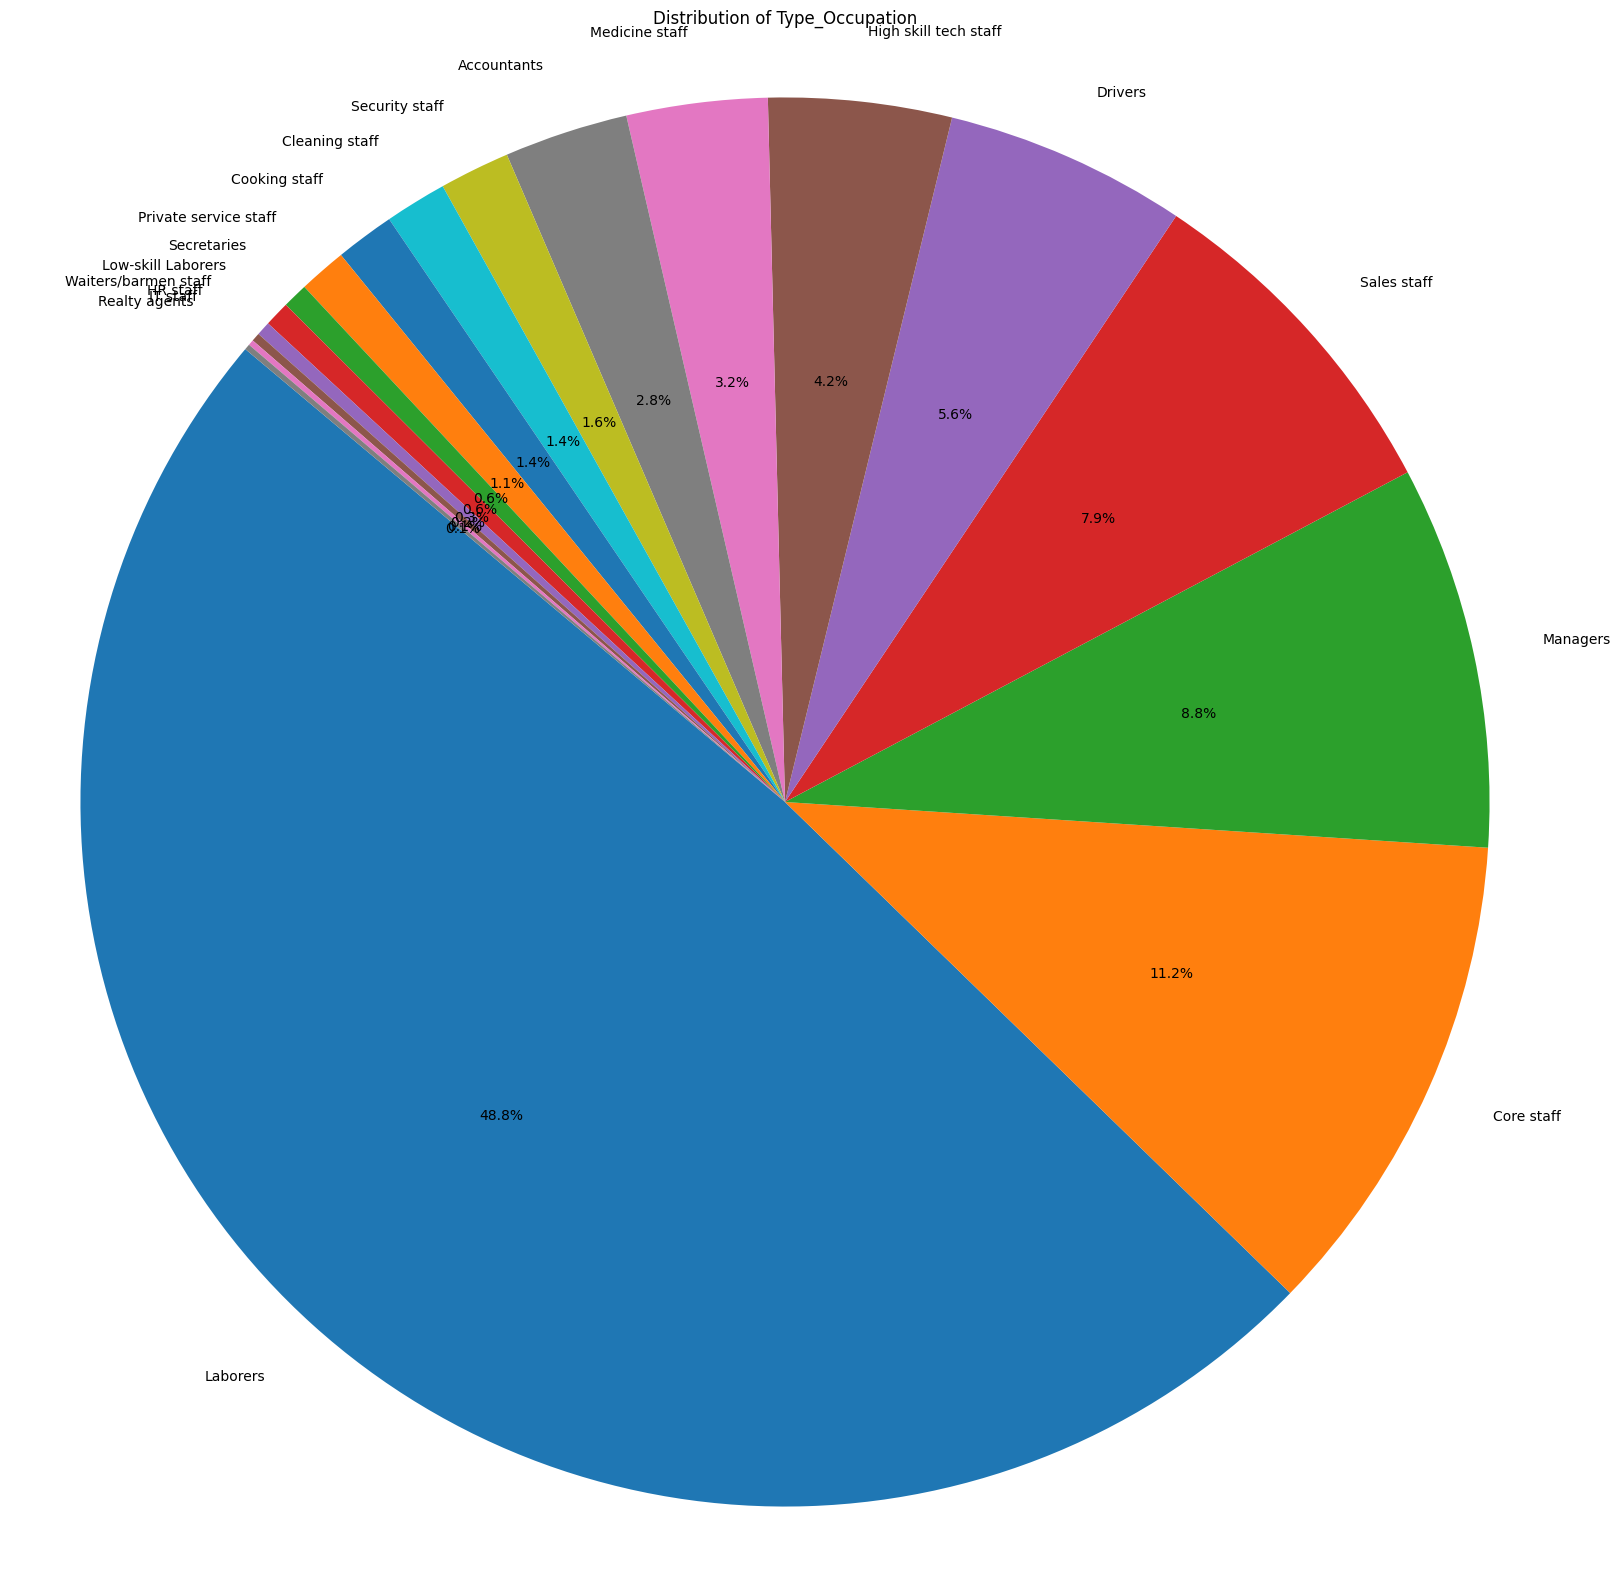

In [142]:
for col in application.select_dtypes(exclude="number").columns:
  # Calculate the distribution of values
  value_counts = application[col].value_counts()

  # Create a pie chart
  plt.figure(figsize=(20, 20))  # Set the figure size
  plt.title('Distribution of {}'.format(col))

  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

From the above, there are more
1. Female Applicants Than Male Applicants
2. People without cars than those with cars
3. People with property than those without property
4. People who work for an income
5. People who stopped at secondary education
6. Married Applicants
7. People who live in a house/apartment
8. Labourers than those who do any other type of job

Let's encode the categorical values

In [143]:
from sklearn.preprocessing import LabelEncoder

# Identify and list categorical columns
categorical_columns = application.select_dtypes(include=['object']).columns

# Initialize a label encoder
label_encoder = LabelEncoder()

# Loop through categorical columns and label encode each one
for column in categorical_columns:
    application[column] = label_encoder.fit_transform(application[column])



In [144]:
application.dtypes

GENDER               int64
Car_Owner            int64
Propert_Owner        int64
CHILDREN             int64
Annual_income      float64
Type_Income          int64
EDUCATION            int64
Marital_status       int64
Housing_type         int64
Mobile_phone         int64
Type_Occupation      int64
Family_Members       int64
Age                  int64
Employed_Months      int64
dtype: object

## Dealing With The Unbalanced Classes In The Label Column

First we split the data before balancing as a best practice

In [145]:
from sklearn.model_selection import StratifiedShuffleSplit
# Split the data into features (X) and labels (y)
X = application
y = label['label']

# Initialize Stratified Shuffle Split
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into training and testing sets
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



0    0.886914
1    0.113086
Name: label, dtype: float64

## Classification

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight


## Let us see how our model performs on balanced class weights

In [163]:
# Define the classifiers and their hyperparameters for GridSearchCV
classifiers = {
    'Logistic Regression': (LogisticRegression(class_weight='balanced'), {'C': [0.001, 0.01, 0.1, 1.0]}),
    'Random Forest': (RandomForestClassifier(class_weight='balanced'), {'n_estimators': [10, 50, 100, 200]}),
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced'), {'max_depth': [None, 10, 20, 30]}),
    'Bagging': (BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')), {'n_estimators': [10, 50, 100, 200]}),
}

# Perform GridSearchCV and evaluate each classifier
results = {}
for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1', refit=False)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Set the classifier with the best hyperparameters
    classifiers[name] = (classifier.set_params(**best_params), best_params)
    classifier.fit(X_train, y_train)
    # # Predict on the test set
    y_pred = classifier.predict(X_test)

    # # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'best_params': best_params,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Print the results
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Best Hyperparameters: {metrics['best_params']}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Classifier: Logistic Regression
Best Hyperparameters: {'C': 0.001}
Accuracy: 0.7516
Precision: 0.0800
Recall: 0.1143
F1 Score: 0.0941


Classifier: Random Forest
Best Hyperparameters: {'n_estimators': 50}
Accuracy: 0.9323
Precision: 0.8889
Recall: 0.4571
F1 Score: 0.6038


Classifier: Decision Tree
Best Hyperparameters: {'max_depth': 20}
Accuracy: 0.8935
Precision: 0.5294
Recall: 0.5143
F1 Score: 0.5217


Classifier: Bagging
Best Hyperparameters: {'n_estimators': 200}
Accuracy: 0.9290
Precision: 0.8095
Recall: 0.4857
F1 Score: 0.6071




From the above, Logistic Regression and Decision Trees performed very poorly on the data.

The Bagging And Random Forest Ensemble methods had good precision but they were let down by the Recall scores

## Let us see how our model performs after oversampling the minority weights

In [164]:
from imblearn.over_sampling import SMOTE
train_sm = SMOTE(random_state = 2)
test_sm = SMOTE(random_state = 2)
X_train_res, y_train_res = train_sm.fit_resample(X_train, y_train)
X_test_res, y_test_res = test_sm.fit_resample(X_test, y_test)

In [172]:
# Create instances of the classifiers and their parameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100, 200]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'Bagging': (BaggingClassifier(base_estimator=DecisionTreeClassifier()), {'n_estimators': [10, 50, 100, 200]})
}

# Initialize dictionaries to store results
results = {classifier_name: {} for classifier_name in classifiers}

# Loop through each classifier
for classifier_name, (classifier, param_grid) in classifiers.items():
    # Perform GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_res, y_train_res)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Set the classifier with the best hyperparameters
    classifiers[classifier_name] = (classifier.set_params(**best_params), best_params)
    classifier.fit(X_train_res, y_train_res)
    # Predict on the test set
    y_pred = classifier.predict(X_test_res)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_res, y_pred)
    precision = precision_score(y_test_res, y_pred)
    recall = recall_score(y_test_res, y_pred)
    f1 = f1_score(y_test_res, y_pred)

    # Store the results in the dictionary
    results[classifier_name]['best_params'] = best_params
    results[classifier_name]['accuracy'] = accuracy
    results[classifier_name]['precision'] = precision
    results[classifier_name]['recall'] = recall
    results[classifier_name]['f1'] = f1

# Print the results
for classifier_name, metrics in results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Best Hyperparameters: {metrics['best_params']}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classifier: Logistic Regression
Best Hyperparameters: {'C': 0.001}
Accuracy: 0.4855
Precision: 0.4524
Recall: 0.1382
F1 Score: 0.2117


Classifier: Random Forest
Best Hyperparameters: {'n_estimators': 100}
Accuracy: 0.8455
Precision: 0.9204
Recall: 0.7564
F1 Score: 0.8303


Classifier: Decision Tree
Best Hyperparameters: {'max_depth': 30}
Accuracy: 0.7655
Precision: 0.8120
Recall: 0.6909
F1 Score: 0.7466


Classifier: Bagging
Best Hyperparameters: {'n_estimators': 100}
Accuracy: 0.8145
Precision: 0.8650
Recall: 0.7455
F1 Score: 0.8008




From the above, the models accuracy decreases compared to that of the class weights.

The recall and f1score increases significantly as the classes are more balanced.

## Let us see how our model performs after undersampling the majority weights

In [170]:
from imblearn.under_sampling import RandomUnderSampler

# Create instances of RandomUnderSampler
train_undersampler = RandomUnderSampler(random_state=42)
test_undersampler = RandomUnderSampler(random_state=42)
# Perform downsampling on the training data
X_train_resampled, y_train_resampled = train_undersampler.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = test_undersampler.fit_resample(X_test, y_test)

In [173]:
# Create instances of the classifiers and their parameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100, 200]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'Bagging': (BaggingClassifier(base_estimator=DecisionTreeClassifier()), {'n_estimators': [10, 50, 100, 200]})
}

# Initialize dictionaries to store results
results = {classifier_name: {} for classifier_name in classifiers}

# Loop through each classifier
for classifier_name, (classifier, param_grid) in classifiers.items():
    # Perform GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Set the classifier with the best hyperparameters
    classifiers[classifier_name] = (classifier.set_params(**best_params), best_params)
    classifier.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = classifier.predict(X_test_resampled)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test_resampled, y_pred)
    precision = precision_score(y_test_resampled, y_pred)
    recall = recall_score(y_test_resampled, y_pred)
    f1 = f1_score(y_test_resampled, y_pred)

    # Store the results in the dictionary
    results[classifier_name]['best_params'] = best_params
    results[classifier_name]['accuracy'] = accuracy
    results[classifier_name]['precision'] = precision
    results[classifier_name]['recall'] = recall
    results[classifier_name]['f1'] = f1

# Print the results
for classifier_name, metrics in results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Best Hyperparameters: {metrics['best_params']}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classifier: Logistic Regression
Best Hyperparameters: {'C': 0.001}
Accuracy: 0.4857
Precision: 0.4848
Recall: 0.4571
F1 Score: 0.4706


Classifier: Random Forest
Best Hyperparameters: {'n_estimators': 10}
Accuracy: 0.7286
Precision: 0.7500
Recall: 0.6857
F1 Score: 0.7164


Classifier: Decision Tree
Best Hyperparameters: {'max_depth': 20}
Accuracy: 0.7286
Precision: 0.7353
Recall: 0.7143
F1 Score: 0.7246


Classifier: Bagging
Best Hyperparameters: {'n_estimators': 200}
Accuracy: 0.7000
Precision: 0.6842
Recall: 0.7429
F1 Score: 0.7123




Compared to oversampling, both the recall score and precision drop but the precision and accuracy are very similar

## Summary Key Findings and Insights

Random Forest often outperforms Bagging and Logistic Regression in many classification tasks due to its ensemble and feature selection characteristics:

    Ensemble of Decision Trees: Random Forest is an ensemble method that combines the predictions of multiple decision trees. This ensemble nature helps reduce overfitting because it aggregates the predictions of multiple models, which can lead to more robust and accurate results.

    Random Feature Selection: Random Forest introduces randomness by selecting a random subset of features at each split of a decision tree. This feature selection strategy reduces the correlation between individual trees and increases the diversity of the ensemble. As a result, it helps to capture different patterns in the data and reduces overfitting.

    Bootstrap Aggregation (Bagging): Random Forest builds on the concept of bagging (Bootstrap Aggregating), which involves training multiple models on random subsets of the training data with replacement. Bagging alone (e.g., as in BaggingClassifier) can improve model performance by reducing variance, but Random Forest takes it a step further by introducing random feature selection within each tree.

    Bias-Variance Trade-off: Random Forest effectively addresses the bias-variance trade-off. Individual decision trees (especially deep ones) can have high variance and low bias, leading to overfitting. However, by combining multiple trees and averaging their predictions, Random Forest achieves a good balance between bias and variance.

    Out-of-Bag (OOB) Error Estimation: Random Forest provides an efficient method for estimating model performance using the out-of-bag (OOB) error. This is an estimate of how well the model will generalize to unseen data without the need for a separate validation set.

    Highly Non-linear Decision Boundaries: Random Forest can capture complex, highly non-linear decision boundaries in the data, which may not be as easily attainable by simpler models like Logistic Regression.

    Robust to Irrelevant Features: Random Forest is robust to irrelevant or noisy features because it's unlikely that irrelevant features will consistently appear in the randomly selected subsets.

## Suggestions for next steps

The next steps in analyzing this data could include reviewing the applicant's credit history to further validate the eligibility of the applicant to have his application approved